# Text Summarization

--------------------------------------------------------------------------------------------

* Text summarization is the process of condensing a large piece of text into a shorter version while retaining the key information and meaning.

* In retrieval-augmented generation (RAG), text summarization condenses information from many documents, helping the LLM to understand the key details and use them to generate better, more accurate responses.

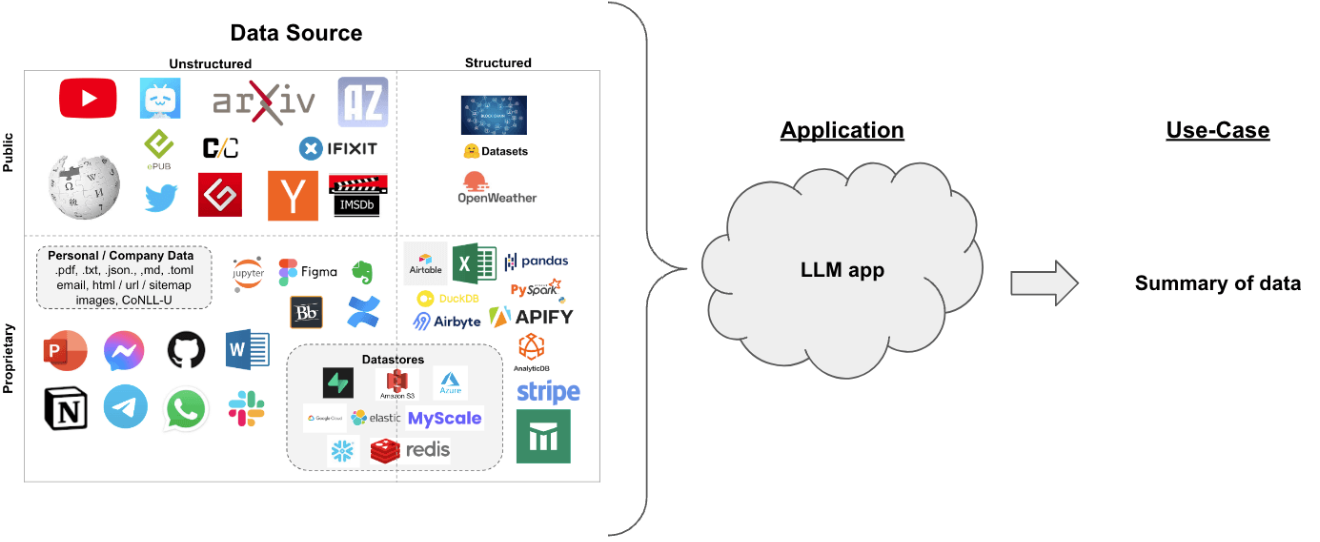

------------------------------------------------------------------------------------------

## Types of Text Summarization in Langchain

### 1. StuffDocumentChain :

* joins all documents together and feeds them to the model in one go.

* Usage : when Documents are small enough to fit into one prompt. Not good for large files (token limit issue).

### 2. Map-reduce :

* for larger sets of documents. This splits documents into batches, summarizes those, and then summarizes the summaries.

* Usage : This is used especially for larger files. It can be done with single prompt Template and multiple prompt template.

### 3. Refine :

* Starts with a summary of the first chunk, then keeps improving it by reading the next chunk, again and again.

* Usage : Use when order and flow is matter.

eg: 📺 Episode 1: You write a short summary:
“A detective starts investigating a missing person case.”

📺 Episode 2: You update the summary:
“A detective investigates a missing person. He finds a mysterious clue in an old motel.”

📺 Episode 3: You refine again:
“A detective investigates a missing person. He uncovers a crime ring after discovering a clue in a motel.”

------------------------------------------------------------------------------------------

## Process Flow

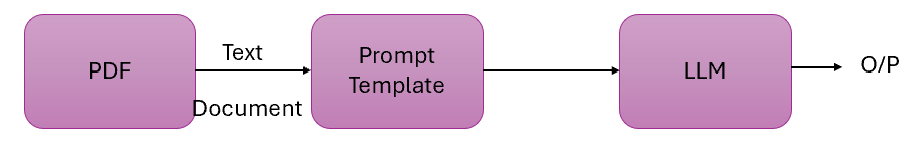

In [2]:
# To Import the .env file
import os
from dotenv import load_dotenv
load_dotenv()

# Import the API keys from .env file
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY") # Access Groq 

#Import neccessary Libraries
from langchain_groq import ChatGroq
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [3]:
llm = ChatGroq(model_name = "Llama3-8b-8192")

In [4]:
speech = """ I have a dream that one day down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification – one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.

I have a dream today.

I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed and all flesh shall see it together.

This is our hope. This is the faith that I go back to the South with. With this faith we will be able to hew out of the mountain of despair a stone of hope. With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.

This will be the day, this will be the day when all of God’s children will be able to sing with new meaning “My country ’tis of thee, sweet land of liberty, of thee I sing. Land where my father’s died, land of the Pilgrim’s pride, from every mountainside, let freedom ring! """

In [5]:
speech

' I have a dream that one day down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification – one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.\n\nI have a dream today.\n\nI have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed and all flesh shall see it together.\n\nThis is our hope. This is the faith that I go back to the South with. With this faith we will be able to hew out of the mountain of despair a stone of hope. With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work together, to pray together, to struggle together, to go

### Method 1

In [6]:
chat_message = [
    SystemMessage(content = " You are expert with expertise in summarizing speech"),
    HumanMessage(content = f"Please provide a short and concise summary of the following speech :\n Text:{speech}")
]

In [7]:
# find how many tokens present in the speech
llm.get_num_tokens(speech)

315

In [9]:
# print the summarized text
llm(chat_message)

AIMessage(content='In this speech, Martin Luther King Jr. expresses his dream of a future where racial segregation and discrimination are eradicated, and African American and white children can grow up together as equals. He envisions a world where every individual, regardless of race, can live freely and harmoniously, with the glory of God revealed to all. King emphasizes the importance of faith and hope in achieving this goal, and concludes by referencing the iconic American song "My Country \'Tis of Thee," with the added phrase "let freedom ring" to symbolize the ultimate goal of achieving true freedom and equality for all.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 342, 'total_tokens': 464, 'completion_time': 0.101666667, 'prompt_time': 0.09162632, 'queue_time': 0.16008486100000002, 'total_time': 0.193292987}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, 

* Now the tokens is reduced to 122

------------------------------------------------------------------------------------------

### Method 2: Prompt Template Text Summarization

In [10]:
from langchain.chains import LLMChain # LLMChain, whenever we combine prompt template with llm
from langchain import PromptTemplate

generictemplate = """ 
Write a summary of the following speech:
speech : {speech}
Translate the precise summary to {language}
"""

prompt = PromptTemplate (input_variables = ['speech','language'],
                         template = generictemplate)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template=' \nWrite a summary of the following speech:\nspeech : {speech}\nTranslate the precise summary to {language}\n')

In [12]:
# simply format and display to see how prompt looks
complete_prompt = prompt.format(speech = speech, language="French")
complete_prompt

' \nWrite a summary of the following speech:\nspeech :  I have a dream that one day down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification – one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.\n\nI have a dream today.\n\nI have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed and all flesh shall see it together.\n\nThis is our hope. This is the faith that I go back to the South with. With this faith we will be able to hew out of the mountain of despair a stone of hope. With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work t

In [13]:
llm.get_num_tokens(complete_prompt)

338

In [15]:
llm_chain = LLMChain(llm=llm, prompt = prompt)
summary = llm_chain.run({'speech':speech,'language':'Tamil'})
summary

'Summary:\n\nMartin Luther King Jr. delivers a powerful speech, expressing his dream of a future where racial segregation and discrimination will cease to exist. He envisions a day when children of different races will be able to join hands and live together as sisters and brothers. He also speaks of his faith in the power of hope and brotherhood, which will enable people to work together towards a brighter future. He concludes by referencing the iconic American song "My Country \'Tis of Thee", with a slight modification to emphasize the importance of freedom and equality for all.\n\nTamil Translation:\n\nநான் ஒரு கனவு கொண்டிருக்கிறேன். அதாவது ஒரு நாள் அலபாமாவில், அதன் ராஜாக்களின் மொழியில் இடையூறும் நிரூபணம் உள்ளது என்று நினைக்கிறேன். அந்த நாளில் சிவப்பு குழந்தைகள் மற்றும் வெளிப்பாடு குழந்தைகள் சிஸ்டர்ஸ் மற்றும் தம்பர்களாக இணைந்து கொள்ளும். அந்த நாளில் எங்கள் எதிரெடுப்புக்களிலேயே வெளி ஆவது என்று நினைக்கிறேன்.\n\nஎன் நம்பிக்கையால் நாம் மலையில் இருக்கும் அழுக்குக்களை தீர்க்கும் ஒரு கற்கள

------------------------------------------------------------------------------------------

## 1. StuffDocumentChain Text Summarization

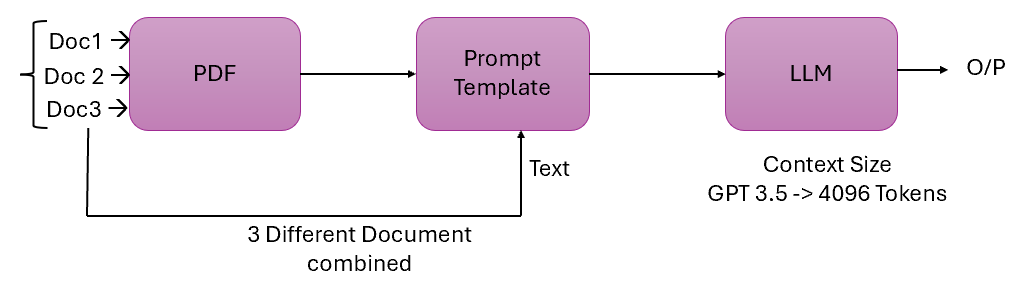

* If we have many documents, we combine it into text and pass it to the placeholder in prompt template and given to llm.

* But in this case if the tokens is very large, llm cannot process it, eg GPT 3.5 can only process 4096 tokens in a run time.

* So we cannot use this if the document size is big

* Use : When document Fits in LLM Context Window

### Implementation

#### Step 1: Load the Documents

In [17]:
from langchain_community.document_loaders import PyPDFLoader

# Load the Document
loader = PyPDFLoader("Data/Genesis.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'source': 'Data/Genesis.pdf', 'page': 0, 'page_label': '1'}, page_content='Genesis 1 \nThe Beginning \n1. In the beginning God created the heavens and the earth. \n2. Now the earth was formless and empty, darkness was over the surface of the deep, and the \nSpirit of God was hovering over the waters. \n3. And God said, “Let there be light, ” and there was light.  \n4. God saw that the light was good, and he separated the light from the darkness.  \n5. God called the light “day, ” and the darkness he called “night. ” And there was evening, and \nthere was morning—the first day. \n6. And God said, “Let there be a vault between the waters to separate water from water. ”  \n7. So God made the vault and separated the water under the vault from the water above it. And \nit was so.  \n8. God called the vault “sky. ” And there was evening, and there was morning—the second day. \n9. And God said, “Let the water under the sky be gathered to one place, and let dry ground \napp

#### Step 2 : Create the Prompt

In [18]:
template= """ Write a cpncise and short summary of the following speech,
speech:{text}"""

prompt = PromptTemplate(input_variables=['text'], template = template)

#### Step 3 : Create chain and LLM

In [21]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm, chain_type = "stuff",prompt=prompt)
output_summary = chain.run(docs)
output_summary

'Here is a concise and short summary of the speech:\n\nThe speech, Genesis 1, is an account of the creation of the world and all living things by God. The story begins with God creating the heavens and earth, followed by the formation of light, day and night, the separation of water and land, and the creation of vegetation, sun, moon, stars, and living creatures. On the sixth day, God creates mankind in his own image and gives them dominion over the earth and all its creatures. God sees all that he has made and declares it "very good."'

------------------------------------------------------------------------------------------

## 2. MapReduce Summarization

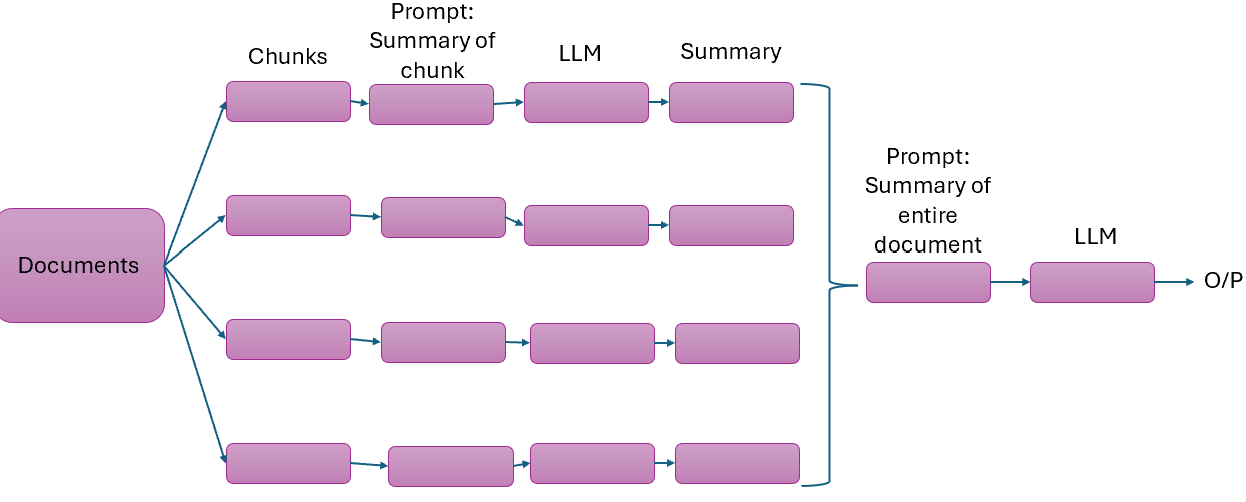

* Here if the document is Big , we convert the document into smaller chunks and pass to prompt template and then to llm model to get the summary 1 and so on with other chunks.
  
* After getting all the summary, combine all the summary and get our final summary

* Use : When document Do not Fits in LLM Context Window

### Implementation

#### Step 1: Load the Documents

In [22]:
from langchain_community.document_loaders import PyPDFLoader

# Load the Document
loader = PyPDFLoader("Data/Genesis.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'source': 'Data/Genesis.pdf', 'page': 0, 'page_label': '1'}, page_content='Genesis 1 \nThe Beginning \n1. In the beginning God created the heavens and the earth. \n2. Now the earth was formless and empty, darkness was over the surface of the deep, and the \nSpirit of God was hovering over the waters. \n3. And God said, “Let there be light, ” and there was light.  \n4. God saw that the light was good, and he separated the light from the darkness.  \n5. God called the light “day, ” and the darkness he called “night. ” And there was evening, and \nthere was morning—the first day. \n6. And God said, “Let there be a vault between the waters to separate water from water. ”  \n7. So God made the vault and separated the water under the vault from the water above it. And \nit was so.  \n8. God called the vault “sky. ” And there was evening, and there was morning—the second day. \n9. And God said, “Let the water under the sky be gathered to one place, and let dry ground \napp

#### Step 2: Split the documents into chunks

In [23]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap=100)
final_documents = text_splitter.split_documents(docs)
final_documents

[Document(metadata={'source': 'Data/Genesis.pdf', 'page': 0, 'page_label': '1'}, page_content='Genesis 1 \nThe Beginning \n1. In the beginning God created the heavens and the earth. \n2. Now the earth was formless and empty, darkness was over the surface of the deep, and the \nSpirit of God was hovering over the waters. \n3. And God said, “Let there be light, ” and there was light.  \n4. God saw that the light was good, and he separated the light from the darkness.  \n5. God called the light “day, ” and the darkness he called “night. ” And there was evening, and \nthere was morning—the first day. \n6. And God said, “Let there be a vault between the waters to separate water from water. ”  \n7. So God made the vault and separated the water under the vault from the water above it. And \nit was so.  \n8. God called the vault “sky. ” And there was evening, and there was morning—the second day. \n9. And God said, “Let the water under the sky be gathered to one place, and let dry ground \napp

#### step 3: Create Prompt for chunks

In [25]:
chunk_prompt = """
Please Summarize the below speech:
speech :{text}
summary:"""

chunk_prompt_template = PromptTemplate(input_variables=['text'],
                                       template = chunk_prompt)

#### Step 4 : Pass the prompt to each chunk and get response from LLM

In [26]:
from langchain.chains.summarize import load_summarize_chain

llm = ChatGroq(model_name = "Llama3-8b-8192")

chunk_chain = load_summarize_chain(llm = llm, chain_type = "map_reduce",map_prompt=chunk_prompt_template )

#### Step 5 : Create Prompt to get final summary

In [27]:
final_prompt = '''
provide the final summary of the entire speech with these important points.
Add a motivation title, start the precise summary with an introduction and provide the summary in number points for the speech.
speech:{text}'''

final_prompt_template = PromptTemplate(input_variables=['text'],
                                       template = final_prompt)

#### Step 6: Pass it to chain and get response

In [30]:
summary_chain = load_summarize_chain(
    llm = llm, 
    chain_type = "map_reduce",
    map_prompt=chunk_prompt_template, # it will give summary of chunks
    combine_prompt= final_prompt_template
)

output = summary_chain.run(final_documents)
output

'**Motivation Title:** "The Masterpiece of Creation: A Summary of the Biblical Account of the World\'s Origin"\n\n**Introduction:** The book of Genesis, chapter 1, provides a vivid account of the creation of the world by God. This passage describes the creation of the heavens and the earth, the separation of light from darkness, the formation of the land and seas, and the creation of living creatures. Here is a summary of the speech in key points:\n\n**Summary:**\n\n1. **Creation of the Heavens and the Earth**: God created the heavens and the earth, which were initially formless and empty (Genesis 1:1).\n2. **Separation of Light and Darkness**: God said "Let there be light" and created light, separating it from darkness, and called the light "day" and the darkness "night" (Genesis 1:3-5).\n3. **Creation of the Land and Seas**: God created a vault (sky) to separate the water under it from the water above, and gathered the water under the sky to one place, allowing dry ground to appear (

------------------------------------------------------------------------------------------

## 3. Refine Text Summarization

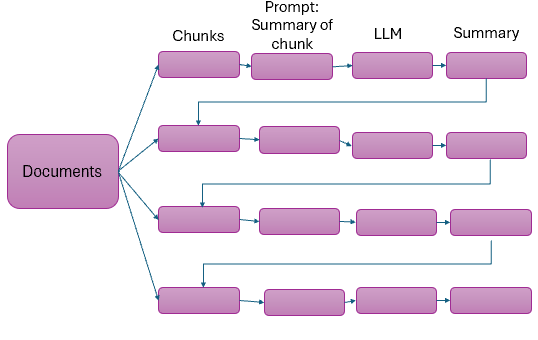

* Its bit similar to Mapreduce but the difference is, after creating the chunks, the 1'st chunk uses prompt template to get response from llm.

* This summarized text from the chunk1 is passed as a reference to chunk2, and then passed to llm and so on with other chunks..

### Implementation

#### Refine Chain

In [32]:
# Step 1: Load the Documents
from langchain_community.document_loaders import PyPDFLoader

# Load the Document
loader = PyPDFLoader("Data/Genesis.pdf")
docs = loader.load_and_split()

# Step 2: Split the documents into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
final_documents = text_splitter.split_documents(docs)

# Step 3: Create Prompt for the initial summary
initial_prompt = """
Please summarize the following speech:
speech: {text}
summary:
"""

initial_prompt_template = PromptTemplate(input_variables=['text'], 
                                         template=initial_prompt)

# Step 4: Create Refine Prompt 
refine_prompt = """
Here is a previous summary:
{existing_answer}

Please refine it with the following additional content:
{text}

Improved summary:
"""

refine_prompt_template = PromptTemplate(input_variables=['existing_answer', 'text'], 
                                        template=refine_prompt)

llm = ChatGroq(model_name="Llama3-8b-8192")

# Refine summarization chain
refine_chain = load_summarize_chain(
    llm=llm, 
    chain_type="refine", 
    question_prompt=initial_prompt_template, 
    refine_prompt=refine_prompt_template
)

# Step 6: Generate the refined summary
output = refine_chain.run(final_documents)
print(output)


Here is the refined summary with the additional content:

The speech describes the creation of the world by God. The chapter begins by stating that God created the heavens and the earth, and that the earth was formless and empty with darkness covering the surface of the deep. God then spoke and created light, separating it from darkness and calling it "day" and "night". The next day, God created a vault in the sky to separate the water above and below it, and called it "sky". On the third day, God gathered the water under the sky to one place, causing dry ground to appear. He then called the dry ground "land" and the gathered waters "seas", and saw that it was good. God continued to create, commanding the land to produce vegetation, including seed-bearing plants and trees that bear fruit with seed in it, according to their various kinds. And it was so. The land produced vegetation, and God saw that it was good. The day ended with evening and morning, marking the third day.

On the four

------------------------------------------------------------------------------------------